In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv("../data/California_latlng_merged.csv")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,title,variety,winery,province_id,variety_numerical,vintage,lat,lon,total_fires,sum_fire_size
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,38.297137,-122.285529,0,0.00
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011,37.050096,-121.990591,4,79.10
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011,38.293313,-122.469386,0,0.00
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,7,80,2013,38.297137,-122.285529,122,1339.78
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap,7,514,2015,35.282753,-120.659616,82,719.08


In [4]:
len(pd.unique(data['winery']))

1559

In [5]:
# Helper function to count the number of samples in each cluster

def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

In [6]:
x = data.loc[:, ['variety_numerical', 'price', 'vintage']]
y = data.loc[:, ['points']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [8]:
matched = 0
for i in range(len(predict)):
    if(predict[i] == int(y_test.iloc[i])):
        matched += 1;

print(matched/len(predict))

0.20030737704918034


In [9]:
accuracy_score(y_test, predict)

0.20030737704918034

(array([5.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 3.800e+01,
        0.000e+00, 0.000e+00, 7.100e+01, 0.000e+00, 1.550e+02, 0.000e+00,
        0.000e+00, 2.890e+02, 0.000e+00, 0.000e+00, 5.410e+02, 0.000e+00,
        7.540e+02, 0.000e+00, 0.000e+00, 1.204e+03, 0.000e+00, 0.000e+00,
        6.690e+02, 0.000e+00, 1.595e+03, 0.000e+00, 0.000e+00, 1.370e+03,
        0.000e+00, 0.000e+00, 1.200e+03, 0.000e+00, 1.024e+03, 0.000e+00,
        0.000e+00, 5.830e+02, 0.000e+00, 0.000e+00, 1.920e+02, 0.000e+00,
        4.000e+01, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00]),
 array([80.        , 80.37254902, 80.74509804, 81.11764706, 81.49019608,
        81.8627451 , 82.23529412, 82.60784314, 82.98039216, 83.35294118,
        83.7254902 , 84.09803922, 84.47058824, 84.84313725, 85.21568627,
        85.58823529, 85.96078431, 86.33333333, 86.70588235, 87.07843137,
        87.45098039, 87.82352941, 88.19607843, 88.56862745, 88.94117647,


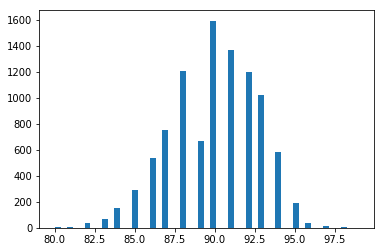

In [10]:
plt.hist(data['points'], bins='auto') 

In [11]:
points = data.loc[:,'points']
points = np.array(points, dtype=pd.Series)
points = points.reshape(-1, 1)
cluster = KMeans(n_clusters = 3, random_state = 0).fit(points)
point_bins = cluster.labels_

data['point_bin'] = point_bins

In [17]:
# Helper function to get the top x in col from data from each cluster

# example usage: get_top_x_per_cluster(x, 'points', data, labels, n)
# x = the top number 'x' from each cluster
# col = the column with an attribute about the dataset
# data = the dataframe with the entire datset
# clusters = the clusters of each point
# n = the number of clusters formed using for k-means

def get_top_x_per_cluster(x, col, data, clusters, n):
    top_lists = [dict() for i in range(n)]
    c = 0
    
    for index, row in data.iterrows():
        i = clusters[c]
        c += 1
        if row[col] in top_lists[i]:
            top_lists[i][row[col]] += 1
        else:
             top_lists[i][row[col]] = 1
    
    print("\nTop", x, col, 'in each cluster')
    for i in range(n):
        print("\nCluster ", i)
        sorted_list = sorted(top_lists[i].items(), key=lambda kv: kv[1])
        sorted_list = list(reversed(sorted_list))
        for y in range(x):
            if(y < len(sorted_list)):
                print(sorted_list[y])
    return
    

In [19]:
label_count(point_bins)
get_top_x_per_cluster(10,'points',data,point_bins,3)

{1: 3063, 2: 3634, 0: 3060}

Top 10 points in each cluster

Cluster  0
(92, 1200)
(93, 1024)
(94, 583)
(95, 192)
(96, 40)
(97, 13)
(98, 7)
(99, 1)

Cluster  1
(88, 1204)
(87, 754)
(86, 541)
(85, 289)
(84, 155)
(83, 71)
(82, 38)
(81, 6)
(80, 5)

Cluster  2
(90, 1595)
(91, 1370)
(89, 669)


In [13]:
x = data.loc[:, ['variety_numerical', 'price', 'vintage']]
y = data.loc[:, ['point_bin']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.4994877049180328

In [14]:
x = data.loc[:, ['variety_numerical', 'price', 'vintage', 'total_fires', 'sum_fire_size']]
y = data.loc[:, ['point_bin']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.5158811475409836

In [15]:
x = data.loc[:, ['total_fires', 'sum_fire_size']]
y = data.loc[:, ['point_bin']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.45389344262295084